In [3]:
import numpy as np

In [8]:
x = np.random.randn(10, 1, 28, 28) # 무작위로 데이터 작성 (batch,ch,h,w)

In [10]:
x.shape

(10, 1, 28, 28)

In [13]:
# 첫번째 데이터 접근
x[0].shape # (1, 28, 28)

(1, 28, 28)

In [14]:
# 두번째 데이터 접근
x[1].shape # (1, 28, 28)

(1, 28, 28)

In [19]:
# 첫 번째 데이터의 첫 채널의 공간 데이터 접근
x[0, 0] # 또는 x[0][0] (28,28)

array([[ 1.88152206e+00,  2.98644083e-02, -3.06385623e-01,
        -5.27537331e-01, -1.11897535e-01,  2.78314738e+00,
         7.17075852e-01, -1.61419675e+00,  1.01643629e+00,
         5.16392652e-01, -1.91761490e+00,  1.83982466e+00,
         4.47601830e-01,  1.28828846e+00, -1.32987709e+00,
         1.83866288e+00,  7.37409045e-01, -6.70118188e-01,
         7.88003119e-01, -1.16940803e+00,  1.48020842e+00,
         4.32503809e-01, -3.95150352e-01, -8.09121072e-01,
        -1.26870596e+00, -1.64313580e+00, -4.39447490e-01,
        -3.40680737e-01],
       [ 5.83829406e-01,  9.09575242e-01,  1.24492705e+00,
         1.31922502e+00,  1.40907945e+00, -1.65396328e+00,
         8.49101602e-01,  1.64408529e-01, -3.94882119e-01,
         7.25973287e-01,  7.76710526e-01,  1.09451756e-02,
        -1.87456369e-01,  1.58104076e+00,  6.77987210e-01,
         1.75255520e-01, -5.60458080e-01, -1.38389086e+00,
         1.15533018e+00, -1.74438192e+00,  1.82960539e+00,
        -5.18584229e-02,  8.10

In [18]:
# 첫 번째 데이터의 첫 채널의 공간 데이터 접근
x[0][0].shape

(28, 28)

In [91]:
# 다수의 이미지를 입력받아 2차원 배열로 평탄화 (데이터를 잃지 않는다.)
def im2col(input_data, filter_h, filter_w, stride=1, pad=0):
    N, C, H, W = input_data.shape # 각 차원(int) 할당
    out_h = (H + 2*pad - filter_h)//stride + 1 # 필터에서 나온 출력 h,w
    out_w = (W + 2*pad - filter_h)//stride + 1
    
    # padding : np.pad       #  N       C        H          W           df = 0
    img = np.pad(input_data, [(0,0), (0,0), (pad, pad), (pad, pad)], 'constant')
                             # padding x 
    
    # 2d 반환해서 담을 빈 col 행렬 (6d)    
    # 특정 데이터(N)에 대해서,필터의 특정 채널(C)의 특정 원소(filter_h, filter_w)가 곱해지는 값들의 모음(out_h, out_w)
    # 모든 데이터의 모든 채널에 대해...
    col = np.zeros((N, C, filter_h, filter_w, out_h, out_w))

    # (filter_h, filter_w)를 순회 - 슬라이싱 시작점
    for y in range(filter_h): 
        y_max = y + stride*out_h 
        for x in range(filter_w): 
            x_max = x + stride*out_w
            # 이미지 뽑아내서 채우기
            """
            이미지를 추출하는 부분 (slicing)
            y -> y:y_max:stride : y에서부터 y_max까지, stride식 건너뛰면서 slicing
            :, : -> 모든 데이터와 모든 채널에 대해서
            """
            col[:, :, y, x, :, :] = img[:, :, y:y_max:stride, x:_max:stride]            
    # transpose하지 않으면 reshape 시에 원래 우리가 의도했던 행렬이 아니라, 어딘가 뒤틀린 행렬이 된다.
    col = col.traspose(0, 4, 5, 1, 2, 3).reshape(N*out_h*out_w, -1) # 데이터 N개에 대해 다 펼쳐버리기 2d
    """
    ((N, C, filter_h, filter_w, out_h, out_w) -> (N, out_h, out_w, C, filter_h, filter_w)로 변경
    """
    return col

In [114]:
col = np.zeros((1, 2, 3, 3, 2, 2))
col.shape

(1, 2, 3, 3, 2, 2)

In [115]:
col = np.zeros(1, 2, 3, 3, 2, 2)
col.shape

TypeError: zeros() takes from 1 to 3 positional arguments but 6 were given

In [63]:
test = np.random.rand(1, 2, 3, 3)
test.shape

(1, 2, 3, 3)

In [64]:
a, b, c, d = test.shape
print(a)
print(b)
print(c)
print(d)

1
2
3
3


In [65]:
pad = 1
padded_image = np.pad(test, [(pad,0), (0,0), (pad, pad), (pad, pad)], 'constant')

print("Original Image:")
print(test)
print("Padded Image:")
print(padded_image)

Original Image:
[[[[0.89657111 0.49404124 0.26165824]
   [0.47736492 0.37694221 0.18532952]
   [0.89091348 0.27012177 0.64877062]]

  [[0.04469717 0.58381878 0.35854326]
   [0.96230515 0.33787411 0.63821609]
   [0.80653756 0.03619817 0.34002149]]]]
Padded Image:
[[[[0.         0.         0.         0.         0.        ]
   [0.         0.         0.         0.         0.        ]
   [0.         0.         0.         0.         0.        ]
   [0.         0.         0.         0.         0.        ]
   [0.         0.         0.         0.         0.        ]]

  [[0.         0.         0.         0.         0.        ]
   [0.         0.         0.         0.         0.        ]
   [0.         0.         0.         0.         0.        ]
   [0.         0.         0.         0.         0.        ]
   [0.         0.         0.         0.         0.        ]]]


 [[[0.         0.         0.         0.         0.        ]
   [0.         0.89657111 0.49404124 0.26165824 0.        ]
   [0.     

In [66]:
padded_image.shape

(2, 2, 5, 5)

In [134]:
test.reshape(a, -1).shape

(1, 18)

In [67]:
filter_h

2

In [70]:
filter_h = 2
filter_w = 2
out_h = 1
out_w = 1
col = np.zeros((a, b, filter_h, filter_w, out_h, out_w))
col.shape

(1, 2, 2, 2, 1, 1)

In [87]:
filter_h = 2
filter_w = 2
out_h = 1
out_w = 1
stride = 2
for y in range(filter_h): # 0~2
        y_max = y + stride*out_h
        print(f'y는 : {y}')
        for x in range(filter_w):
            x_max = x + stride*out_w
            print(f'현재 y,x 좌표: ({y}, {x})')
            print(y_max, x_max)
            col[:, :, y, x, :, :] = img[:, :, y:y_max:stride, x:x_max:stride]
            #print(y)
            #print(col)

y는 : 0
현재 y,x 좌표: (0, 0)
2 2
현재 y,x 좌표: (0, 1)
2 3
y는 : 1
현재 y,x 좌표: (1, 0)
3 2
현재 y,x 좌표: (1, 1)
3 3


In [94]:
import sys, os
sys.path.append(os.pardir)
from common.util import im2col

x1 = np.random.rand(1, 3, 7, 7) # (데이터 수, 채널 수, 높이, 너비) rand:0~1범위
col1 = im2col(x1, 5, 5, stride=1, pad=0)
print(col1.shape) # (9, 75)

x2 = np.random.rand(10, 3, 7, 7) # 데이터 10개
col2 = im2col(x2, 5, 5, stride=1, pad=0)
print(col2.shape) # (90, 75)

(9, 75)
(90, 75)


In [96]:
class Convolution:
    def __init__(self, W, b, stride=1, pad=0):
        self.W = W
        self.b = b
        self.stride = stride
        self.pad = pad

        # backward 시 사용
        self.x = None   
        self.col = None
        self.col_W = None
        # 가중치와 편향 매개변수의 기울기 (=AFFINE)
        self.dW = None
        self.db = None
        
    def forward(self, x):
        FN, C, FH, FW = self.W.shape # (개수,채널,높,너)
        N, C, H, W = x.shape # input
        out_h = int(1 + (H + 2*self.pad - FH) / self.stride) # 정수로 떨어져야
        out_w = int(1 + (W + 2*self.pad - FW) / self.stride)

        col = im2col(x, FH, FW, self.stride, self.pad) # (N*OH*OW, C*FH*FW)
        col_W = self.W.reshape(FN, -1).T # 필터 전개 (C*FH*FW, FN)
        out = np.dot(col, col_W) + self.b # Affine과 동일 (N*OH*OW, FN)

        # 다시 4차원으로
        out = out.reshape(N, out_h, out_w, -1).transpose(0, 3, 1, 2) # (N,FN,OH,OW)

        self.x = x
        self.col = col
        self.col_W = col_W
        
        return out

    def backward(self, dout):
        FN, C, FH, FW = self.W.shape
        # shape 되돌리기
        dout = dout.transpose(0,2,3,1).reshape(-1, FN) # (N,FN,OH,OW)->(N,OH,OW,FN)->(FN, -1).T 복구
                                                       # Affine-(N*OH*OW, FN)
        # 3 :  Affine, db (합, 여과없이)
        self.db = np.sum(dout, axis=0) 
        # 2 : Affine, dw (곱, 교차)
        self.dW = np.dot(self.col.T, dout) # (N*OH*OW, C*FH*FW)T @ (N*OH*OW, FN)
                                           # 결과-(C*FH*FW, FN)
        self.dW = self.transpose(1, 0).reshape(FN, C, FH, FW) # w의 원래 형태
        # 1 : Affine, dx (곱, 교차)
        dcol = np.dot(dout, self.col_W.T) # (N*OH*OW, FN) @ (C*FH*FW, FN)T
                                          # 결과-(N*OH*OW, FN)
        # im2col역전파 (col->img)
        dx = col2im(dcol, self.x.shape, FH, FW, self.stride, self.pad)
           # col2im(col, input_shape, filter_h, filter_w, stride=1, pad=0)
        return dx

In [ ]:
# 다수의 이미지를 입력받아 2차원 배열로 평탄화 (데이터를 잃지 않는다.)
def im2col(input_data, filter_h, filter_w, stride=1, pad=0):
    N, C, H, W = input_data.shape # 각 차원(int) 할당
    out_h = (H + 2*pad - filter_h)//stride + 1 # 필터에서 나온 출력 h,w
    out_w = (W + 2*pad - filter_h)//stride + 1
    
    # padding : np.pad       #  N       C        H          W           df = 0
    img = np.pad(input_data, [(0,0), (0,0), (pad, pad), (pad, pad)], 'constant')
                             # padding x 
    
    # 2d 반환해서 담을 빈 col 행렬 (6d)    
    # 특정 데이터(N)에 대해서,필터의 특정 채널(C)의 특정 원소(filter_h, filter_w)가 곱해지는 값들의 모음(out_h, out_w)
    # 모든 데이터의 모든 채널에 대해...
    col = np.zeros((N, C, filter_h, filter_w, out_h, out_w))

    # (filter_h, filter_w)를 순회 - 슬라이싱 시작점
    for y in range(filter_h): 
        y_max = y + stride*out_h 
        for x in range(filter_w): 
            x_max = x + stride*out_w
            # 이미지 뽑아내서 채우기
            """
            이미지를 추출하는 부분 (slicing)
            y -> y:y_max:stride : y에서부터 y_max까지, stride식 건너뛰면서 slicing
            :, : -> 모든 데이터와 모든 채널에 대해서
            """
            col[:, :, y, x, :, :] = img[:, :, y:y_max:stride, x:_max:stride]            
    # transpose하지 않으면 reshape 시에 원래 우리가 의도했던 행렬이 아니라, 어딘가 뒤틀린 행렬이 된다.
    col = col.traspose(0, 4, 5, 1, 2, 3).reshape(N*out_h*out_w, -1) # 데이터 N개에 대해 다 펼쳐버리기 2d
    """
    ((N, C, filter_h, filter_w, out_h, out_w) -> (N, out_h, out_w, C, filter_h, filter_w)로 변경
    """
    return col

In [15]:
def col2im(col, input_shape, filter_h, filter_w, stride=1, pad=0):
    #im2col(input_data, filter_h, filter_w, stride=1, pad=0)
    """
    < 2차원 이미지 -> 다수의 이미지 묶음 >
    윈도우가 겹치지 않을 경우 : 단순한 재배열 → 역재배열을 이용한 역전파
    윈도우가 겹칠 경우 : repeat노드 등장 → sum노드를 이용한 역전파
    """
    N, C, H, W = input_shape
    out_h = (H + 2*pad - filter_h)//stride + 1
    out_w = (W + 2*pad - filter_w)//stride + 1
    # im2col, (N, C, filter_h, filter_w, out_h, out_w)]
    #         -> (N, out_h, out_w, C, filter_h, filter_w) -> (N*out_h*out_w, -1)
    col = col.reshape(N, out_h, out_w, C, filter_h, filter_w).transpose(0, 3, 4, 1, 2)
    
    # col -> img 값 담음
    img = np.zeros((N, C, H + 2*pad + stride - 1, W + 2*pad + stride - 1)) 
    """
    y + stride*out_h이 각 위치에서의 최댓값
    filter_h - 1 + stride*out_h --(출력크기식)--> filter_h - 1 + stride*((H + 2*pad - filter_h)//stride + 1)
    = filter_h + -1 + stride + H + 2*pad - filter_h
    """
    for y in range(filter_h):
        y_max = y + stride*out_h
        for x in range(filter_w):
            x_max = x + stride*out_W
            # col[:, :, y, x, :, :] = img[:, :, y:y_max:stride, x:x_max:stride]
            img[:, :, y:y_max:stride, x:x_max:stride] += col[:, :, y, x, :, :]

         # img = np.pad(input_data, [(0,0), (0,0), (pad, pad), (pad, pad)], 'constant')
    return img[:, :, pad:H + pad, pad:W + pad] # 패딩 부분을 제외한!! 원래 이미지 (N, C, H, W)를 반환

In [8]:
for y in range(2):
        y_max = y + 1*3
        print(f'y_max:{y_max}')
        for x in range(2):
            x_max = x + 1*3
            print(x_max)

y_max:3
3
4
y_max:4
3
4


In [13]:
import numpy as np

# 주어진 이미지 배열 (예를 들어, 3채널 RGB 이미지)
# 이 배열은 (높이, 너비)가 각각 4인 이미지로 가정합니다.
img = np.array([
    [[1, 2, 3, 4],
     [5, 6, 7, 8],
     [9, 10, 11, 12],
     [13, 14, 15, 16]],
    
    [[17, 18, 19, 20],
     [21, 22, 23, 24],
     [25, 26, 27, 28],
     [29, 30, 31, 32]],
    
    [[33, 34, 35, 36],
     [37, 38, 39, 40],
     [41, 42, 43, 44],
     [45, 46, 47, 48]]
])

# 패딩을 정의합니다.
pad = 1

# 패딩을 적용한 이미지의 높이와 너비를 계산합니다.
H, W = img.shape[1], img.shape[2]
padded_H = H + 2 * pad
padded_W = W + 2 * pad

# 패딩을 적용합니다.
padded_img = np.zeros((img.shape[0], padded_H, padded_W))
padded_img[:, pad:H + pad, pad:W + pad] = img

# 패딩된 이미지를 출력합니다.
print("Padded Image:")
print(padded_img)
print()

# img[:, pad:H + pad, pad:W + pad]를 사용하여 패딩된 부분을 선택합니다.
selected_part = padded_img[:, pad:H + pad, pad:W + pad]

print("Selected Part:")
print(selected_part)

Padded Image:
[[[ 0.  0.  0.  0.  0.  0.]
  [ 0.  1.  2.  3.  4.  0.]
  [ 0.  5.  6.  7.  8.  0.]
  [ 0.  9. 10. 11. 12.  0.]
  [ 0. 13. 14. 15. 16.  0.]
  [ 0.  0.  0.  0.  0.  0.]]

 [[ 0.  0.  0.  0.  0.  0.]
  [ 0. 17. 18. 19. 20.  0.]
  [ 0. 21. 22. 23. 24.  0.]
  [ 0. 25. 26. 27. 28.  0.]
  [ 0. 29. 30. 31. 32.  0.]
  [ 0.  0.  0.  0.  0.  0.]]

 [[ 0.  0.  0.  0.  0.  0.]
  [ 0. 33. 34. 35. 36.  0.]
  [ 0. 37. 38. 39. 40.  0.]
  [ 0. 41. 42. 43. 44.  0.]
  [ 0. 45. 46. 47. 48.  0.]
  [ 0.  0.  0.  0.  0.  0.]]]

Selected Part:
[[[ 1.  2.  3.  4.]
  [ 5.  6.  7.  8.]
  [ 9. 10. 11. 12.]
  [13. 14. 15. 16.]]

 [[17. 18. 19. 20.]
  [21. 22. 23. 24.]
  [25. 26. 27. 28.]
  [29. 30. 31. 32.]]

 [[33. 34. 35. 36.]
  [37. 38. 39. 40.]
  [41. 42. 43. 44.]
  [45. 46. 47. 48.]]]


In [16]:
def im2col(input_data, filter_h, filter_w, stride=1, pad=0):
    N, C, H, W = input_data.shape
    out_h = (H + 2*pad - filter_h)//stride + 1
    out_w = (W + 2*pad - filter_w)//stride + 1

    img = np.pad(input_data, [(0,0), (0,0), (pad, pad), (pad, pad)], 'constant')
    col = np.zeros((N, C, filter_h, filter_w, out_h, out_w))

    for y in range(filter_h):
        y_max = y + stride*out_h
        for x in range(filter_w):
            x_max = x + stride*out_w
            col[:, :, y, x, :, :] = img[:, :, y:y_max:stride, x:x_max:stride]

    col = col.transpose(0, 4, 5, 1, 2, 3).reshape(N*out_h*out_w, -1)
    return col


def col2im(col, input_shape, filter_h, filter_w, stride=1, pad=0):
    N, C, H, W = input_shape
    out_h = (H + 2*pad - filter_h)//stride + 1
    out_w = (W + 2*pad - filter_w)//stride + 1
    col = col.reshape(N, out_h, out_w, C, filter_h, filter_w).transpose(0, 3, 4, 5, 1, 2)

    img = np.zeros((N, C, H + 2*pad + stride - 1, W + 2*pad + stride - 1))
    for y in range(filter_h):
        y_max = y + stride*out_h
        for x in range(filter_w):
            x_max = x + stride*out_w
            img[:, :, y:y_max:stride, x:x_max:stride] += col[:, :, y, x, :, :]

    return img[:, :, pad:H + pad, pad:W + pad]

In [24]:
class Pooling:
  def __init__(self, pool_h, pool_w, stride=1, pad=0):
    self.pool_h = pool_h
    self.pool_w = pool_w
    self.stride = stride
    self.pad = pad
    # backward 사용
    self.x = None
    self.arg_max = None
 
  def forward(self, x):
    N, C, H, W = x.shape
    # 항상 해주네 (패딩없다.)
    out_h = int(1 + (H - self.pool_h) / self.stride)
    out_w = int(1 + (W - self.pool_w) / self.stride)
 
    # 전개 (1)       (filter에 해당)
    col = im2col(x, self.pool_h, self.pool_w, self.stride, self.pad)
    col = col.reshape(-1, self.pool_h*self.pool_w) # col = 풀링 size
 
    # 최댓값 (2)
    arg_max = np.argmax(col, axis=1) #idx
    out = np.max(col, axis=1) # 각 행마다 max
 
    # 성형 (3) : N,H,W,C -> N,C,H,W (input과 동일)
    out = out.reshape(N, out_h, out_w, C).transpose(0, 3, 1, 2) 

    self.x = x
    self.arg_max = arg_max
      
    return out

  def backward(self, dout):
      # 재배열 (3) 
      #  순전파 때 N,OH,OW,C -> N,C,OH,OW
      dout = dout.transpose(0, 2, 3, 1)
      
      # max (2)
      # (미분픽셀수, PH * PW) 크기의 0행렬을 만들고 순전파시 max위치에 대입

      # 순전파 때 col = col.reshape(-1, self.pool_h*self.pool_w) 
      pool_size = self.pool_h * self.pool_w      
      dmax = np.zeros((dout.size, pool_size)) # (N*C*OH*OW, PH*PW)
      dmax[np.arange(self.arg_max.size), self.arg_max.flatten()] = dout.flatten() # 나머진0
      dmax = dmax.reshape(dout.shape, (pool_size,)) # (N, OH, OW, C, PH*PW)
      # 즉, col.reshape(-1, self.pool_h*self.pool_w) 이 전 복원

      # 재배열 & col2lim (1)
      # (N*OH*OW, C*PH*PW) <- im2col: return (N*out_h*out_w, -1)
      dcol = dmax.reshape(dmax.shape[0] * dmax.shape[1] * dmax.shape[2], -1) 
      # def col2im(col, input_shape, filter_h, filter_w, stride=1, pad=0):
      dx = col2im(dcol, self.x.shape, self.pool_h, self.pool_w, self.stride, self.pad)

1줄: dout은 순전파에서 출력되었던 형태인 (N, C, OH, OW) 크기로 입력됩니다.

2줄: dout = dout.transpose(0, 2, 3, 1)를 통해서 (N, OH, OW, C) 크기로 변환합니다.

5줄: dmax = np.zeros((dout.size, pool_size)) 에서 순전파 때 생성되었던 col 배열과 같은 크기인 (N * OH * OW * C, PH * PW) 크기의 영배열을 만듭니다.

6줄: dmax[np.arange(self.arg_max.size), self.arg_max.flatten()] = dout.flatten()를 이용하여 최대값을 가졌던 인덱스에 역전파된 미분값을 대입하고 나머지는 0으로 놓습니다.

7줄: dmax = dmax.reshape(dout.shape + (pool_size,)) 를 이용하여 dmax 의 크기를 (N, OH, OW, C, PH * PW) 크기로 변환합니다.

9줄: dcol = dmax.reshape(dmax.shape[0] * dmax.shape[1] * dmax.shape[2], -1) 를 이용하여 (N * OH * OW, C * PH * PW) 형태로 변환합니다.

10줄: dx = col2im(dcol, self.x.shape, self.pool_h, self.pool_w, self.stride, self.pad)를 이용하여 순전파 때 입력되었던 원래 데이터의 크기 self.x.shape로 변환하여 최대 풀링의 역전파를 반환합니다. 이 부분에서 col2im에서 설명한 것과 같이 같은 변수에 대한 미분값이 더해집니다.

In [19]:
dmax = np.zeros((1*1*5*5, 3*3))
dmax.shape

(25, 9)

In [21]:
print(dmax.shape[0])
print(dmax.shape[1])
print(dmax.shape[2])

25
9


IndexError: tuple index out of range

In [128]:
class SimpleConvNet: 
    def __init__(self, input_dim=(1, 28, 28), 
                 conv_param={'filter_num':30, 'filter_size':5, 'pad':0, 'stride':1},
                 hidden_size=100, output_size=10, weight_init_std=0.01):
        # 하이퍼파라미터 딕셔너리에서 꺼내기 (나중에 쓰기 편함)
        filter_num = conv_param['filter_num']   # 30
        filter_size = conv_param['filter_size'] # 5
        filter_pad = conv_param['pad']          # 0
        filter_stride = conv_param['stride']    # 1
        input_size = input_dim[1] # (C,H,W)     
        conv_output_size = (input_size - filter_size + 2*filter_pad) / \
                        filter_stride + 1       # 24
        pool_output_size = int(filter_num * (conv_output_size/2) * (conv_output_size/2)) # 2x2 max!! (/실수반환)

        # 가중치 초기화
        self.params = {}
        # x->Conv(합성곱계층)
        self.params['W1'] = weight_init_std * \
                            np.random.randn(filter_num, input_dim[0], filter_size, filter_size)
        self.params['b1'] = np.zeros(filter_num)
        # pool->Affine(완전연결1)
        self.params['W2'] = weight_init_std * \
                            np.random.randn(pool_output_size, hidden_size)
        self.params['b2'] = np.zeros(hidden_size)
        # Affine->Softmax(완전연결2)
        self.params['W3'] = weight_init_std * \
                            np.random.randn(hidden_size, output_size)
        self.params['b3'] = np.zeros(output_size)

        # 계층 생성 (conv - relu - pool - affine - relu - affine – softmax_
        self.layers = OrderedDict()
        self.layers['Conv1'] = Convolution(self.params['W1'], self.params['b1'],
                                           conv_param['stride'], conv_param['pad'])
        self.layers['Relu1'] = Relu()
        self.layers['Pool1'] = Pooling(pool_h=2, pool_w=2, stride=2)
        self.layers['Affine1'] = Affine(self.params['W2'], self.params['b2'])
        self.layers['Relu2'] = Relu()
        self.layers['Affine2'] = Affine(self.params['W3'], self.params['b3'])

        self.last_layer = SoftmaxWithLoss()

    def predict(self, x):
        for layer in self.layers.values():
            x = layer.forward(x)
        return x

    def loss(self, x, t):
        y = self.precict(x)
        return self.last_layer.forward(y, t)

    def gradient(self, x, t):
        # forward
        self.loss(x, t)

        # backward
        dout = 1
        dout = self.last_layer.backward(dout)

        layers = list(self.layers.values())
        layers.reverse()
        for layer in layers:
            dout = layer.backward(dout)

        # save
        grads = {}
        grads['W1'] = self.layers['Conv1'].dw
        grads['b1'] = self.layers['Conv1'].db
        # 한 줄로도 쓸 수 있다.
        grads['W2'], grads['b2'] = self.layers['Affine1'].dW, self.layers['Affine1'].db
        grads['W3'], grads['b3'] = self.layers['Affine2'].dW, self.layers['Affine2'].db

        return grads

    def save_params(self, file_name="params.pkl"):
        params={}
        for key, val in self.params.items():
            params[key] = val 
        with open(file_name, 'wb') as f:
            pickle.dump(params, f)

    def load_params(self, file_name="params.pkl"):
        with open(file_name, 'rb') as f:
            params = pickle.load(f)
        for key, val in params.items():
            self.params[key] = val

        for i, key in enumerate(['Conv1', 'Affine1', 'Affine2']):
            self.layers[key].W = self.params['W' +str(i+1)]
            self.layers[key].b = self.params['b' + str(i+1)]

In [ ]:
import sys, os
sys.path.append(os.pardir) 
import numpy as np
import matplotlib.pyplot as plt
from dataset.mnist import load_mnist
from simple_convnet import SimpleConvNet
from common.trainer import Trainer

# 데이터 읽기
(x_train, t_train), (x_test, t_test) = load_mnist(flatten=False) # 이미지!

max_epoch = 20

network = SimpleConvNet(input_dim=(1, 28, 28),
                        conv_param={'filter_num': 30, 'filter_size': 5, 'pad': 0, 'stride': 1},
                        hidden_size=100, output_size=10, weight_init_std=0.01)

trainer = Trainer(network, x_train, t_train, x_test, t_test, 
                  epochs=max_epoch, mini_batch_size=100,
                  optimizer='Adam', optimizer_param={'lr':0.001},
                  evaluate_sample_num_per_epoch=1000)
trainer.train()

# 매개변수 보존
network.save_params("params.pkl")
print("Saved Network Parameters!")

markers = {'train': 'o', 'test': 's'}
x = np.arange(max_epoch)
plt.plot(x, trainer.train_acc_list, marker='o', label='train', markevery=2)
plt.plot(x, trainer.test_acc_list, marker='s', label='test', markevery=2)
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
plt.legend(loc='lower right')
plt.show()

In [124]:
trainer.train_acc_list[-1]

0.999

In [155]:
trainer.max_iter

12000

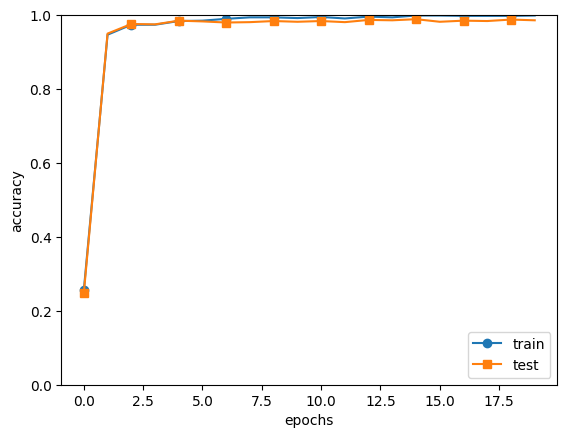

In [127]:
markers = {'train': 'o', 'test': 's'}
x = np.arange(max_epoch)
plt.plot(x, trainer.train_acc_list, marker='o', label='train', markevery=2)
plt.plot(x, trainer.test_acc_list, marker='s', label='test', markevery=2)
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
plt.legend(loc='lower right')
plt.show()

In [ ]:
    # 동일 모델 바로 사용 가능하도록
    def save_params(self, file_name="params.pkl"):
        # 딕셔너리에 저장
        params = {}
        for key, val in self.params.items():
            params[key] = val
        # writebinary (없으면 create/덮어쓰기/ab) 
        # binary-그대로저장 (png...)
        with open(file_name, 'wb') as f:
            pickle.dump(params, f)

    def load_params(self, file_name="params.pkl"):
        # readbinary
        with open(file_name, 'rb') as f:
            params = pickle.load(f)
        for key, val in params.items(): # 모델에 저장
            self.params[key] = val

        # 각 레이어의 가중치와 편향에 불러온 매개변수를 할당(Relu 빼야돼서 일단 직접 지정)
        for i, key in enumerate(['Conv1', 'Affine1', 'Affine2']): # index&key
            self.layers[key].W = self.params['W' + str(i+1)]
            self.layers[key].b = self.params['b' + str(i+1)]

In [ ]:
# readline_all.py
f = open("params.pkl", 'rb')
while True:
    line = f.readline()
    if not line: break
    print(line)
f.close()

In [ ]:
import pickle

with open("params.pkl", 'rb') as f:
    params = pickle.load(f)

print(params)

In [131]:
print(params['W1'].shape)

(30, 1, 5, 5)


In [150]:
import sys, os
sys.path.append(os.pardir)
import numpy as np
from  common.optimizer import *

# 신경망 훈련을 대신 해준다!
class Trainer:   #8
    def __init__(self, network, x_train, t_train, x_test, t_test,  # network, data
                 epochs=20, mini_batch_size=100,                    # batch, epoch
                 optimizer='SGD', optimizer_param={'lr':0.01},      # optimizer, hyperparam            
                 evaluate_sample_num_per_epoch=None, verbose=True): # evaluate~Num, logmessage(2-detailed)
        
        self.network = network #1
        self.verbose = verbose #2
        self.x_train = x_train #3
        self.t_train = t_train 
        self.x_test = x_test 
        self.t_test = t_test 
        self.epochs = epochs #4
        self.batch_size = mini_batch_size #5
        self.evaluate_sample_num_per_epoch = evaluate_sample_num_per_epoch #6

        # 7 : optimizer
        optimizer_class_dict = {'sgd':SGD, 'momentum':Momentum, 'nesterov':Nesterov,
                                'adagrad':AdaGrad, 'rmsprpo':RMSprop, 'adam':Adam}
        self.optimizer = optimizer_class_dict[optimizer.lower()](**optimizer_param) 
                                            # param 대문자로 받아서 소문자로 바꿔야 key랑 동일
                                            # ** : dictionary 중 value값을 넣겠다 ( * list/tuple)
        self.train_size = x_train.shape[0]
        self.iter_per_epoch = max(self.train_size / mini_batch_size, 1) # 얘도 round나 int 취해야할듯
                                                                        # round(0.5) : 0 round(1.5) : 2
        self.max_iter = int(epochs * self.iter_per_epoch) # 몇 1에폭을 몇번 반복? "버림"을 취한다.
        self.current_iter = 0
        self.current_epoch = 1

        self.train_loss_list = []
        self.train_acc_list = []
        self.test_acc_list = []

    def train_step(self):
        batch_mask = np.random_choice(self.train_size, self.batch_size)
        x_batch = self.x_train[batch_mask]
        t_batch = self.t_train[batch_mask]

        grads = self.network.gradient(x_batch, t_batch) # return grads
        self.optimizer.update(self.network.params, grads) # param update(self.lr)

        loss = self.network.loss(x_batch, t_batch)
        self.train_loss_list.append(loss)   
        if self.verbose: print("train loss:" + str(loss))

        if self.current_iter % self.iter_per_epoch == 0: # 0부터 시작
            self.current_epoch += 1                      # 근데 iter_per_epoch이 실수면? 

            # t까지의 데이터로 evaluate data
            x_train_sample, t_train_sample = self.x_train, self.t_train
            s_test_sample, t_test_sample = self.x_test, self._t_test            
            if not self.evaluate_sample_num_per_epoch is None:
                t = self.evaluate_sample_num_per_epoch
                x_train_sample, t_train_sample = self.x_train[:t], self.t_train[:t]
                x_test_sample, t_test_sample = self.x_test[:t], self.t_test[:t]
            train_acc = self.network.accuracy(x_train_sample, t_train_sample)
            test_acc = self.network.accuracy(x_test_sample, t_test_sample)
            self.train_acc_list.append(train_acc)
            self.test_acc_list.append(test_acc)
                                                    # 1부터
            if self.verbose: print("=== epoch:" + str(self.current_epoch) + 
                                   ", train acc:" + str(train_acc) + ", test acc:" + str(test_acc) + " ===")
        self.current_iter += 1

    def train(self): # 진짜 실행 (for문)
        for i in range(self.max_iter): # epoch이 3이면, 3*1에폭당반복횟수
            self.train_step()
            
        # 마지막으로 전체 test 데이터에 대해 측정
        test_acc = self.network.accuracy(self.x_test, self.t_test)

        if self.verbose:
            print("=============== Final Test Accuracy ===============")
            print("test acc:" + str(test_acc))

In [135]:
int(2 * 3.3)

6

In [144]:
print(-1/3)

-0.3333333333333333


In [143]:
print(-1//3)

-1


In [145]:
for i in range(50):
    if (i % -0.3333333333333333 ==0):
        print(i)

0


In [156]:
# 7.6

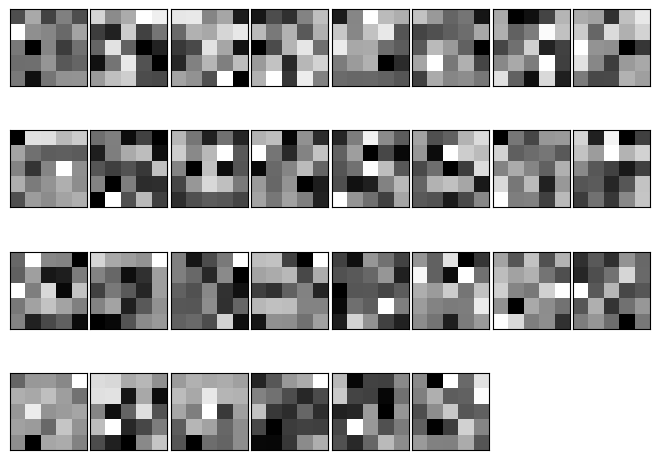

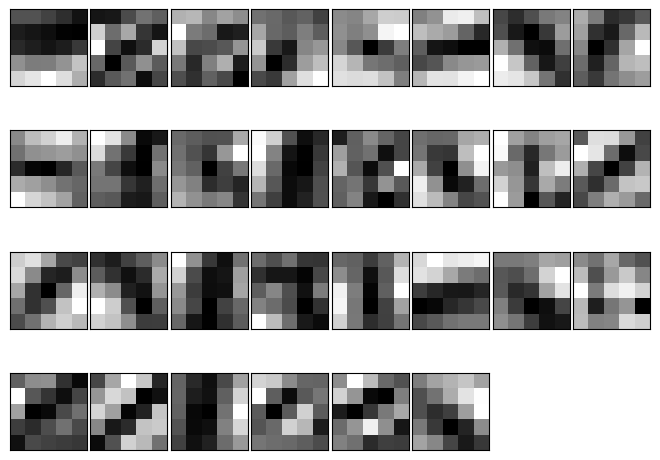

In [178]:
import numpy as np
import matplotlib.pyplot as plt
from simple_convnet import SimpleConvNet
"""
1. `filter_show` 
   - `filters`: 시각화할 필터들의 가중치 배열
   - `nx`: 필터 한 row 당 몇 개를 표시할 것인지
   - `show_num` : 몇 개 보여줄지
   """
def filter_show(filters, nx=8, show_num=16):
    FN, C, FH, FW = filters.shape
    ny = int(np.ceil(FN / nx)) # 30 / 8 = 4.0
            # ceil : 무조건 반올림 

    fig = plt.figure() # 객체 생성 : 여러개 그림 동시에 그리거나, 크기/해상도/배경색 등 속성 조절할 때
    fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05) # 사면위치(비율)&간격 조절

    for i in range(FN):   # row, col 
        ax = fig.add_subplot(ny, nx, i+1, xticks=[], yticks=[]) # 눈금x
        # 원하는 크기의 픽셀/행렬을 만들어서 각 칸을 원하는 색으로 채움
        ax.imshow(filters[i, 0], cmap=plt.cm.gray_r, interpolation='nearest')
                # filter(30,1,5,5)(FN,C,H,W) -> (5,5) 그니까 필터1개당 
                                # 0에 가까울수록 밝게 나타나고 높은 값은 어둠게 표시
                                                    # 픽셀들의 축 위치 간격을 보정하여 이미지가 자연스러운 모양으로 보일 수 있게 하는 방법
                                                    # imshow()에서는 16가지 보간법, 'nearest'는 가장 고해상도인 보간법
    plt.show()

network = SimpleConvNet() # input_dim=(1, 28, 28), conv_param={'filter_num':30, 'filter_size':5, 'pad':0, 'stride':1},
                          # hidden_size=100, output_size=10, weight_init_std=0.01
# 랜덤 초기화
filter_show(network.params['W1'])  # weight_init_std * np.random.randn(filter_num, input_dim[0], filter_size, filter_size)

# 학습된 가중치
network.load_params("params.pkl")
filter_show(network.params['W1'])

In [170]:
network.params['W1'].shape

(30, 1, 5, 5)

In [173]:
network.params['W1'][1, 0].shape

(5, 5)

In [175]:
network.params['W1'][2, 0].shape

(5, 5)

(1, 1, 252, 252)
out.shape[2], out.shape[3] : 252, 252
(252, 252)
(1, 1, 252, 252)
out.shape[2], out.shape[3] : 252, 252
(252, 252)
(1, 1, 252, 252)
out.shape[2], out.shape[3] : 252, 252
(252, 252)
(1, 1, 252, 252)
out.shape[2], out.shape[3] : 252, 252
(252, 252)
(1, 1, 252, 252)
out.shape[2], out.shape[3] : 252, 252
(252, 252)
(1, 1, 252, 252)
out.shape[2], out.shape[3] : 252, 252
(252, 252)
(1, 1, 252, 252)
out.shape[2], out.shape[3] : 252, 252
(252, 252)
(1, 1, 252, 252)
out.shape[2], out.shape[3] : 252, 252
(252, 252)
(1, 1, 252, 252)
out.shape[2], out.shape[3] : 252, 252
(252, 252)
(1, 1, 252, 252)
out.shape[2], out.shape[3] : 252, 252
(252, 252)
(1, 1, 252, 252)
out.shape[2], out.shape[3] : 252, 252
(252, 252)
(1, 1, 252, 252)
out.shape[2], out.shape[3] : 252, 252
(252, 252)
(1, 1, 252, 252)
out.shape[2], out.shape[3] : 252, 252
(252, 252)
(1, 1, 252, 252)
out.shape[2], out.shape[3] : 252, 252
(252, 252)
(1, 1, 252, 252)
out.shape[2], out.shape[3] : 252, 252
(252, 252)
(1, 1, 252

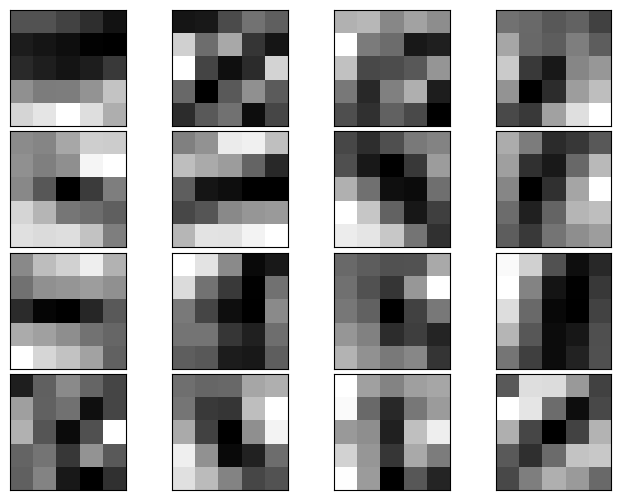

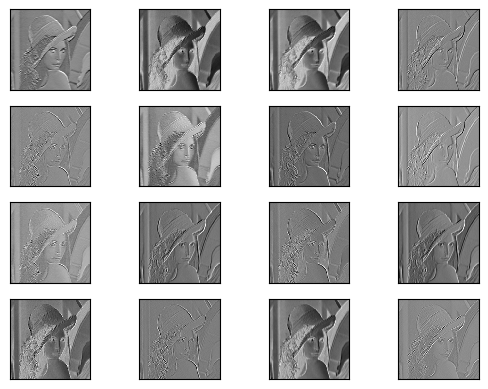

In [186]:
import sys, os
sys.path.append(os.pardir)
import numpy as np
import matplotlib.pyplot as plt
from simple_convnet import SimpleConvNet
from matplotlib.image import imread  # 이미지 읽옴
from common.layers import Convolution

def filter_show(filters, nx=4, show_num=16):
    FN, C, FH, FW = filters.shape
    ny = int(np.ceil(show_num / nx))

    fig = plt.figure()
    fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)

    # 16개만
    for i in range(show_num): # 4 x 4
        ax = fig.add_subplot(4, 4, i+1, xticks=[], yticks=[])
        ax.imshow(filters[i, 0], cmap=plt.cm.gray_r, interpolation='nearest')


network = SimpleConvNet(input_dim=(1,28,28), 
                        conv_param = {'filter_num':30, 'filter_size':5, 'pad':0, 'stride':1},
                        hidden_size=100, output_size=10, weight_init_std=0.01)

# 학습된 가중치
network.load_params("params.pkl")
filter_show(network.params['W1'], 16) # 16개만 보여줄 것

# 이미지 읽어오기
img = imread('../dataset/lena_gray.png') # 256x256(크기)
img = img.reshape(1, 1, *img.shape)      # 1,1,256,256 <- N,C,256,256

fig = plt.figure() # 객체 생성

# 필터 '1개'를 거쳐서 어떻게 나오는지
for i in range(16):
    w = network.params['W1'][i] # filter별 (5,5)
    b = 0 # network.parmams['b1'][i]

    w = w.reshape(1, *w.shape) # (1, 5, 5)
    #b = b.reshape(1, *b.shape)
    conv_layer = Convolution(w, b) # fn,c,h,w : 1=c,5,5
    out = conv_layer.forward(img) # 1,1,252,252
    #print(out.shape)
    #print(f'out.shape[2], out.shape[3] : {out.shape[2]}, {out.shape[3]}')
    out = out.reshape(out.shape[2], out.shape[3]) # 252,252
    #print(out.shape)
    ax = fig.add_subplot(4, 4, i+1, xticks=[], yticks=[])
    ax.imshow(out, cmap=plt.cm.gray_r, interpolation='nearest')

plt.show()    

In [183]:
img = imread('../dataset/lena_gray.png')
img.shape

(256, 256)

In [188]:
a = np.random.randn(5, 5)
a

array([[-1.4158468 , -1.64986448,  0.38835358,  1.68359783,  0.15840323],
       [ 0.33803996,  0.63969716,  0.87958645,  0.39004042,  0.4941239 ],
       [-1.07903905,  0.36244959,  0.33564608,  0.36762336,  1.35515079],
       [-0.23453244,  0.20144935, -0.38698766,  2.2020714 , -0.16908527],
       [ 0.08152929, -0.63551171,  0.48950345, -0.82510452, -0.97495374]])

In [192]:
x = np.random.randn(1, 20)
# np.convolve(a, mode='valid')
s = np.r_[x[10:0:-1], x, x[-1:10:-1]]
s

array([[-0.8029082 , -0.98865505,  0.35555004,  0.846291  , -0.06611687,
         1.41442853,  1.18269112, -0.7039808 , -0.19526898, -0.01717909,
         1.00948086,  1.97451511, -0.49448579, -1.07294786,  0.40539231,
        -0.02091801, -0.09863681, -0.08307919,  0.99484798, -0.05903852]])

In [193]:
s.shape

(1, 20)